# 1. Import libraries to be used in this notebook

In [1]:
import numpy as np # for array manipulation and basic scientific calculation
import xarray as xr # To read NetCDF files
import matplotlib.pyplot as plt # Core library for plotting
from functions.SE_analysis import get_site_index # To get 

# 2. Read files

## 2.1. Model output

In [2]:
Filebase_CONUS = '/glade/campaign/acom/acom-climate/tilmes/CO_CONUS/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01/atm/hist/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h4.2013-08-DD-00000.nc'

# Change "DD" to 01~31 for a month timeseries
Files_CONUS = [] # empty list for a start
# file list with 31 files
for dd in np.arange(31):
    Files_CONUS.append( Filebase_CONUS.replace('DD',str(dd+1).zfill(2)) )
# read 12 files at once using "mf"dataset
ds_CONUS = xr.open_mfdataset( Files_CONUS ) 


## 2.2. SCRIP file
### SCRIP file has grid information that is needed to find index of city
### Don't have to read, just locate where the files are

In [3]:
SCRIP_CONUS = '/glade/p/acom/MUSICA/grids/ne0CONUSne30x8/ne0CONUS_ne30x8_np4_SCRIP.nc'

# 3. Find indices of cities on spectral element grid

In [4]:
# Use python dictionary for lon/lat locations of cities
City_lonlat = {}
City_lonlat['Denver'] = [ 255.0097, 39.7393 ] # Front range
City_lonlat['LA'] = [ 241.7563, 34.0522 ] # Heavy anthropogenic sources
City_lonlat['Centreville'] = [ 272.8614, 32.9446 ] # Biogenics dominant

# Get index of each city location
Index_lonlat = {}
for city in City_lonlat.keys():
    Index_lonlat[city] = get_site_index( City_lonlat[city][0], City_lonlat[city][1], 
                                         scrip_file=SCRIP_CONUS )

# 4. Get timeseries

In [5]:
TS = {}
for city in City_lonlat.keys():
    TS[city] = ds_CONUS['O3_SRF'].values[:,Index_lonlat[city]] # dimension -> time,ncol

# 5. Draw a simple plot

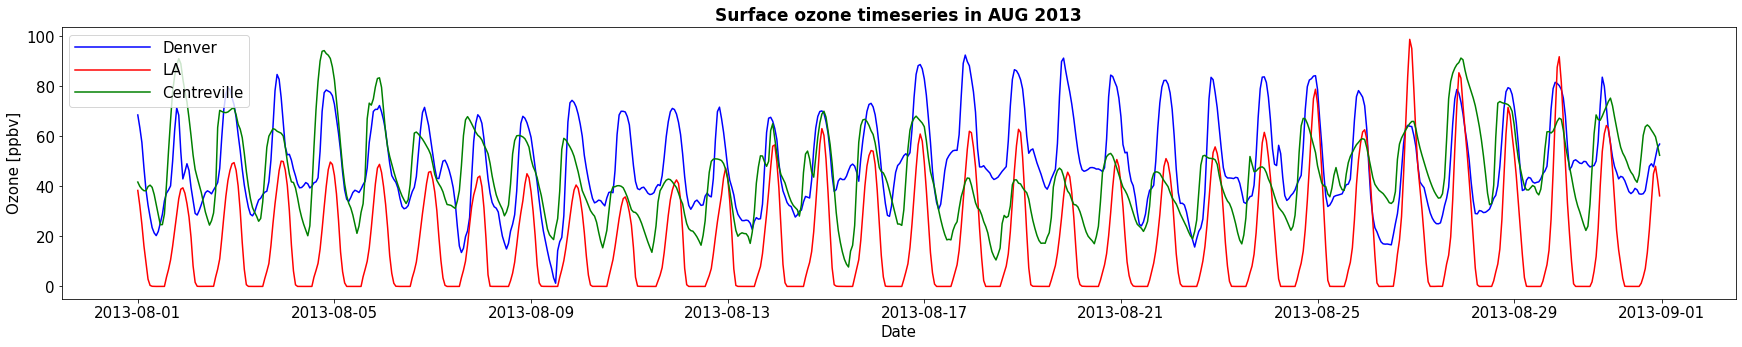

In [6]:
fig = plt.figure( figsize=(30,5) )
ax = fig.add_subplot(1,1,1)

# Plot O3 timeseries
ax.plot( ds_CONUS.time.values, TS['Denver']*1e9, 'b-', label='Denver' )
ax.plot( ds_CONUS.time.values, TS['LA']*1e9, 'r-', label='LA' )
ax.plot( ds_CONUS.time.values, TS['Centreville']*1e9, 'g-', label='Centreville' )


# === Polish the plot === 
# Font size
xticklabels = plt.setp( ax.get_xticklabels(), fontsize=15 )
yticklabels = plt.setp( ax.get_yticklabels(), fontsize=15 )
# Add x & y axis titles
xlabel = ax.set_xlabel( 'Date', fontsize=15 )
ylabel = ax.set_ylabel( 'Ozone [ppbv]', fontsize=15 )
# Add plot title
title = ax.set_title( 'Surface ozone timeseries in AUG 2013', fontsize=17, weight='semibold' )
# Add legend
ax.legend( loc=0, handlelength=5, fontsize=15 )
